In [1]:
import      numpy               as      np
import      matplotlib.pyplot   as      plt
from        lib_Experimentum    import  *
from        Alessandria         import  *

#path dove stanno i dati del fit
now_path        =   '../BRILLOUIN/K27M/analysis/'
n_rows          =   86
n_cols          =   84

matrix = Initialize_Matrix(n_rows,n_cols)

Ho inizializzato una matrice 86x84, per un totale di 7224 spettri


In [2]:
#1) Recupero info su posizioni + info su chi è bono e chi no e su VIPA (questo solo per matrix[0][0])

with open(now_path+'xy.txt', 'r') as fin:
    lines = fin.readlines()[1:]

excluded = ()

with open(now_path+'markov_fit.txt', 'r') as fin:
    fit     =   eval(fin.read())
_,_,_, boni = Unpack_Fit(fit)

with open(now_path+'xy_VIPA.txt', 'r') as fin:
    VIPAs = fin.readlines()[1:]

x_VIPA = np.array(VIPAs[0][1:-2].split(), dtype=float)
y_VIPA = np.array(VIPAs[1][1:-2].split(), dtype=float)

matrix[0][0].Recover_VIPA(x_VIPA, y_VIPA)

count = 0
for ii in range(n_rows):
    for jj in range(n_cols):
        #print(lines[count],lines[count+1] )
        matrix[ii][jj].Recover_Spectrum(np.array(lines[count][1:-2].split(), dtype=float), np.array(lines[count+1][1:-2].split(), dtype=float))
        
        if (ii,jj) not in boni:
            excluded = excluded +((ii,jj),)

        count = count + 2

print('Ok ho recuperato le informazioni sulle posizioni')

Ok ho recuperato le informazioni sulle posizioni


In [4]:
#2) Acquisico i dati prodotti dal fit markoviano e totale


##################### MARKOVIANO

#with open(now_path+'y_markov_fit.txt', 'r') as fin:
#    y_fits = fin.readlines()

with open(now_path+'cost_markov.txt', 'r') as fin:
    costi = fin.readlines()

with open(now_path+'markov_fit_params.txt', 'r') as fin:
    lines   =   fin.readlines()

if (len(boni) != len(lines)):
    raise ValueError("Incompatibilità tra lunghezza file parametri ({}) e informazioni fit ({})".format(len(boni), len(lines)))

#for (line, y_fit, cost, (ii,jj)) in zip(lines, y_fits, costi,  boni) :
for (line, cost, (ii,jj)) in zip(lines, costi,   boni) :
    matrix[ii][jj].Recover_Markov_Fit_Params(line)
    #matrix[ii][jj].Recover_y_markov_fit(y_fit)
    matrix[ii][jj].Recover_cost_markov(float(cost))

print('Ok ho recuperato le informazioni del Fit Markoviano')

################ TOTALE

#with open(now_path+'y_tot_fit.txt', 'r') as fin:
#    y_fits = fin.readlines()

with open(now_path+'cost_tot.txt', 'r') as fin:
    costi = fin.readlines()
with open(now_path+'tot_fit_params.txt', 'r') as fin:
    lines   =   fin.readlines()

if (len(boni) != len(lines)):
    raise ValueError("Incompatibilità tra lunghezza file parametri ({}) e informazioni fit ({})".format(len(boni), len(lines)))

#for (line, y_fit, cost, (ii,jj)) in zip(lines, y_fits, costi,  boni) :
for (line, cost, (ii,jj)) in zip(lines, costi,  boni) :
    matrix[ii][jj].Recover_Tot_Fit_Params(line)
    #matrix[ii][jj].Recover_y_fit(y_fit)
    matrix[ii][jj].Recover_cost_tot(float(cost))

print('Ok ho recuperato le informazioni del Fit Totale')

Ok ho recuperato le informazioni del Fit Markoviano
Ok ho recuperato le informazioni del Fit Totale


In [8]:

for (ii,jj) in boni:
    print(str((ii,jj)))
    matrix[ii][jj].Recover_VIPA(x_VIPA, y_VIPA)
    matrix[ii][jj].Recover_y_markov_fit(matrix[ii][jj].Gauss_Convolve_Markovian_Response_Fast(matrix[ii][jj].Markov_Fit_Params.values[0]))
    matrix[ii][jj].Recover_y_fit(matrix[ii][jj].Convolve_Theoretical_Response_Fast(matrix[ii][jj].Markov_Fit_Params.values[0], matrix[ii][jj].Markov_Fit_Params[list(cols_gauss)].values[0]))

)
(58, 52)
(58, 53)
(58, 54)
(58, 55)
(58, 56)
(58, 57)
(58, 58)
(58, 59)
(58, 60)
(58, 61)
(58, 62)
(58, 63)
(58, 64)
(58, 65)
(58, 66)
(58, 67)
(58, 68)
(58, 69)
(58, 70)
(58, 71)
(58, 72)
(58, 73)
(58, 74)
(58, 75)
(58, 76)
(58, 77)
(58, 78)
(58, 79)
(58, 80)
(58, 81)
(58, 82)
(58, 83)
(59, 0)
(59, 1)
(59, 2)
(59, 3)
(59, 4)
(59, 5)
(59, 6)
(59, 7)
(59, 8)
(59, 9)
(59, 10)
(59, 11)
(59, 12)
(59, 13)
(59, 14)
(59, 15)
(59, 16)
(59, 17)
(59, 18)
(59, 19)
(59, 20)
(59, 21)
(59, 22)
(59, 23)
(59, 24)
(59, 25)
(59, 26)
(59, 27)
(59, 28)
(59, 29)
(59, 30)
(59, 31)
(59, 32)
(59, 33)
(59, 34)
(59, 35)
(59, 36)
(59, 37)
(59, 38)
(59, 39)
(59, 41)
(59, 42)
(59, 43)
(59, 44)
(59, 45)
(59, 46)
(59, 47)
(59, 48)
(59, 49)
(59, 50)
(59, 51)
(59, 52)
(59, 53)
(59, 54)
(59, 55)
(59, 56)
(59, 57)
(59, 58)
(59, 59)
(59, 60)
(59, 61)
(59, 62)
(59, 63)
(59, 64)
(59, 65)
(59, 66)
(59, 67)
(59, 68)
(59, 69)
(59, 70)
(59, 71)
(59, 72)
(59, 73)
(59, 74)
(59, 75)
(59, 76)
(59, 77)
(59, 78)
(59, 79)
(59, 80)


In [10]:
Save_y_markov_fit(matrix, boni, path = now_path)
Save_y_fit(matrix, boni, path = now_path)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)


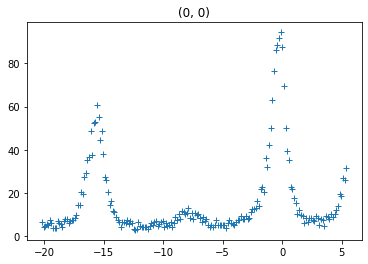

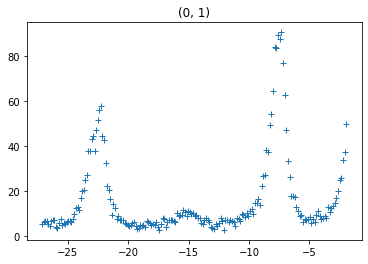

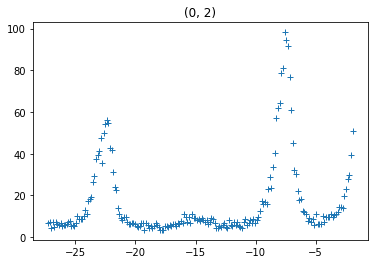

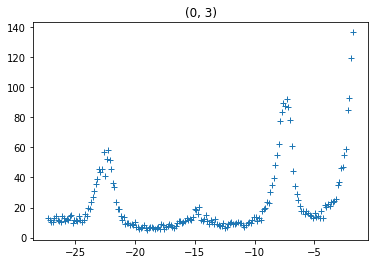

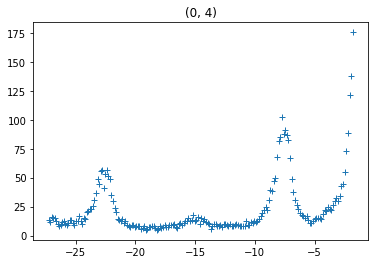

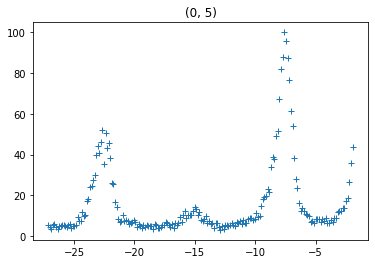

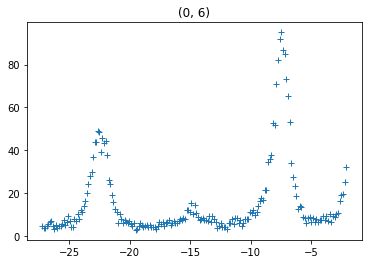

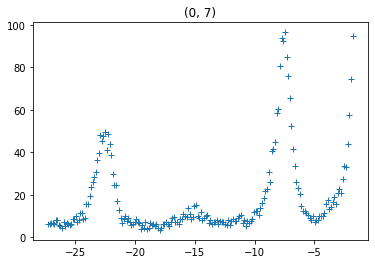

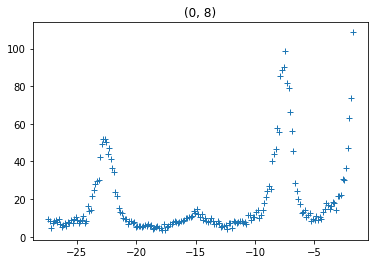

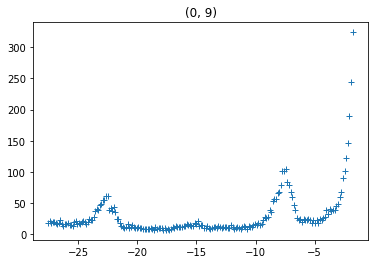

In [5]:
#3) Faccio le mappe


In [88]:


omega_markov_map, _ = Get_Parameter_Map('tot', 'tau', matrix, n_rows, n_cols, excluded, 'seismic', 0, 1.5, fig = 'tau_tot_map', path=now_path)

Completata Parameter_Map per tau
Ho trovato 221 elementi saturati


In [89]:
##funzioni da trasferire
def Get_Parameter_Map(fit, parameter, matrix, n_rows, n_cols, excluded, cmap, inf, sup, Deltas = False,  fig = False, path = './'):


    if fit == 'markov':
        fit_params = 'Markov_Fit_Params'
    elif fit == 'tot':
        fit_params = 'Tot_Fit_Params'
    else:
        raise ValueError ("Specify which fit to verify: 'markov' or 'tot \n")
    if Deltas:
        value = 'StdErrs'
    else:
        value = 'Values'

    p_map   =   np.zeros((n_rows, n_cols))
    nans = ()
    for ii in range(n_rows):
        for jj in range (n_cols):
            if  (ii, jj) not in excluded:
                p_map[ii,jj]    =   getattr(matrix[ii][jj], fit_params)[parameter][value]
            else:
                p_map[ii,jj]    = np.nan
                nans = nans +((ii,jj),)


    print('Completata Parameter_Map per '+parameter)
    print('Ho trovato {} elementi saturati'.format(len(nans)))

    if fig:

        cm = plt.get_cmap(cmap)
        cm.set_bad(color='k')
        plt.matshow(p_map, cmap = cmap)
        plt.clim(inf, sup)
        plt.title(parameter+' Map')
        plt.colorbar()
        plt.xlabel('Row Index')
        plt.ylabel('Col Idx')
        plt.savefig(path + fig+'.pdf', format = 'pdf')
        plt.close()

    return  (p_map, nans)


In [ ]:
for (ii,jj) in boni:

    matrix[ii][jj].Recover_y_markov_fit()